<a href="https://colab.research.google.com/github/sdam-au/PHI_ETL/blob/master/scripts/1_4_MODELLING_DATES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements & Auth



In [1]:
import requests
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#¬†our own package for reading the data
!pip install sddk
import sddk

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#¬†read and execute our script for modelling dates
script_url = "https://raw.githubusercontent.com/sdam-au/modelling_temporal_uncertainty/master/scripts/modelling_distributions.py"
# execute the script
exec(requests.get(script_url).content)

In [3]:
# login to sciencedata 
conf = sddk.configure("SDAM_root", "648597@au.dk")

sciencedata.dk username (format '123456@au.dk'): 648597@au.dk
sciencedata.dk password: ¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑
connection with shared folder established with you as its owner
endpoint variable has been configured to: https://sciencedata.dk/files/SDAM_root/


In [4]:
#¬†read the PHI dataset from sciencedata.dk
#¬†(takes some time - the dataset has almost 400MB)
PHI = sddk.read_file("SDAM_data/PHI/PHI_cleaned_dated_2020-06-30.json", "df", conf)
# older version used during development: PHI = sddk.read_file("SDAM_data/PHI/PHI_enriched_raw.json", "df", conf)
#¬†print first 5 rows of the data
PHI.head(5)

URL   Book  ... certainty  link
0  https://epigraphy.packhum.org/text/1  IG I¬≥  ...      None  None
1  https://epigraphy.packhum.org/text/2  IG I¬≥  ...      None  None
2  https://epigraphy.packhum.org/text/3  IG I¬≥  ...      None  None
3  https://epigraphy.packhum.org/text/4  IG I¬≥  ...      None  None
4  https://epigraphy.packhum.org/text/5  IG I¬≥  ...      None  None

[5 rows x 25 columns]

In [5]:
### how many of the inscriptions have at least one date
len(PHI[(PHI["not_before"].notnull()) | (PHI["not_after"].notnull())])

130533

# Generate random dates for the whole dataset

In [6]:
%%time
# generate a list of 1000 random dates for each inscription in the dataset
# takes approx. 90 seconds in Google colab
PHI["random_dates"] = PHI.apply(lambda row: model_date(row["not_before"], row["not_after"], size=1000,), axis=1)

CPU times: user 1min 35s, sys: 3.24 s, total: 1min 38s
Wall time: 1min 38s


In [15]:
PHI.head(20)

URL  ...                                       random_dates
0    https://epigraphy.packhum.org/text/1  ...  [-499, -502, -500, -504, -508, -507, -506, -50...
1    https://epigraphy.packhum.org/text/2  ...  [-504, -502, -501, -501, -500, -504, -502, -50...
2    https://epigraphy.packhum.org/text/3  ...  [-487, -484, -486, -481, -483, -482, -481, -48...
3    https://epigraphy.packhum.org/text/4  ...  [-485, -484, -484, -485, -485, -485, -485, -48...
4    https://epigraphy.packhum.org/text/5  ...  [-504, -499, -498, -502, -502, -499, -496, -50...
5    https://epigraphy.packhum.org/text/6  ...  [-476, -477, -484, -526, -479, -517, -497, -46...
6    https://epigraphy.packhum.org/text/7  ...  [-459, -451, -452, -455, -459, -453, -454, -45...
7    https://epigraphy.packhum.org/text/8  ...  [-453, -454, -459, -457, -458, -455, -457, -45...
8    https://epigraphy.packhum.org/text/9  ...  [-459, -454, -457, -458, -462, -454, -462, -45...
9   https://epigraphy.packhum.org/text/10  ...  [-466, -458, -459, -466, -466, -464, -462, -45...
10  https://epigraphy.packhum.org/text/11  ...  [-463, -471, -492, -468, -462, -456, -492, -48...
11  https://epigraphy.packhum.org/text/12  ...  [-433, -432, -432, -432, -432, -432, -432, -43...
12  https://epigraphy.packhum.org/text/13  ...  [-457, -462, -455, -453, -457, -458, -455, -45...
13  https://epigraphy.packhum.org/text/14  ...  [-452, -453, -453, -453, -453, -453, -452, -45...
14  https://epigraphy.packhum.org/text/15  ...  [-446, -450, -448, -448, -453, -448, -448, -44...
15  https://epigraphy.packhum.org/text/16  ...  [-452, -455, -449, -454, -451, -451, -448, -45...
16  https://epigraphy.packhum.org/text/17  ...  [-450, -451, -451, -451, -451, -450, -451, -45...
17  https://epigraphy.packhum.org/text/18  ...  [-450, -449, -453, -452, -453, -451, -452, -44...
18  https://epigraphy.packhum.org/text/19  ...  [-450, -449, -450, -450, -450, -450, -450, -45...
19  https://epigraphy.packhum.org/text/20  ...  [-450, -447, -450, -451, -448, -450, -453, -44...

[20 rows x 26 columns]

In [130]:
np.mean([PHI.iloc[0]["not_before"], PHI.iloc[0]["not_after"]])

-505.0

In [8]:
# how many are dated / generated random numbers
len(PHI[PHI["random_dates"].notna()]) / len(PHI)

0.6023617686961819

In [9]:
len(PHI[PHI["hdr1"].str.contains("Attica")])

32652

In [ ]:
PHI_asia_minor = PHI[PHI["hdr1"].str.contains("Asia Minor")]

# Playing with random dates

In [12]:
%%time
PHI_complete_simulations = timeblocks_from_randoms(PHI, "random_dates", [-800, 400, 50])

CPU times: user 2min 16s, sys: 2.37 s, total: 2min 19s
Wall time: 2min 19s


In [44]:
PHI_complete_simulations[1]

[((-800, -750), 14),
 ((-750, -700), 48),
 ((-700, -650), 177),
 ((-650, -600), 250),
 ((-600, -550), 884),
 ((-550, -500), 2027),
 ((-500, -450), 4009),
 ((-450, -400), 4042),
 ((-400, -350), 6243),
 ((-350, -300), 8766),
 ((-300, -250), 8129),
 ((-250, -200), 9102),
 ((-200, -150), 8830),
 ((-150, -100), 7196),
 ((-100, -50), 4877),
 ((-50, 0), 4804),
 ((0, 50), 6110),
 ((50, 100), 6191),
 ((100, 150), 10043),
 ((150, 200), 10313),
 ((200, 250), 9168),
 ((250, 300), 5986),
 ((300, 350), 3110),
 ((350, 400), 2733)]

In [ ]:
PHI_complete_simulations

In [111]:
def desc_stat_from_simulations(simulations):
  tups_desc = []
  for n in range(len(simulations[0])):
    values = [sim[n][1] for sim in simulations]
    tups_desc.append((simulations[0][n][0], np.min(values), np.max(values), np.mean(values), np.median(values), np.var(values) ))
  tups_desc_df = pd.DataFrame(tups_desc)
  tups_desc_df.columns = ["temp_block", "min", "max", "mean", "median", "variance"]
  return tups_desc_df

In [101]:
sims_by_blocks = desc_stat_from_simulations(PHI_complete_simulations)
sims_by_blocks

temp_block    min    max       mean   median     variance
0   (-800, -750)      5     17     11.588     12.0     4.106256
1   (-750, -700)     46     67     55.961     56.0    12.491479
2   (-700, -650)    132    186    161.440    161.0    67.044400
3   (-650, -600)    232    290    260.137    260.0    99.816231
4   (-600, -550)    823    956    881.445    881.0   427.550975
5   (-550, -500)   1986   2169   2055.937   2055.0   640.233031
6   (-500, -450)   3845   4059   3940.888   3940.0  1203.115456
7   (-450, -400)   3999   4241   4114.752   4116.0  1206.238496
8   (-400, -350)   6077   6346   6214.325   6213.0  2029.259375
9   (-350, -300)   8590   8924   8767.954   8768.0  2431.035884
10  (-300, -250)   7972   8334   8152.119   8154.0  3110.860839
11  (-250, -200)   8907   9233   9066.394   9066.0  3037.448764
12  (-200, -150)   8776   9155   8955.586   8957.0  3374.640604
13  (-150, -100)   6974   7306   7125.569   7125.0  2942.343239
14   (-100, -50)   4823   5106   4960.304   4960.0  2133.013584
15      (-50, 0)   4595   4905   4737.531   4737.0  2322.481039
16       (0, 50)   5909   6235   6056.394   6057.0  2839.520764
17     (50, 100)   6039   6406   6234.988   6236.0  2921.069856
18    (100, 150)   9876  10314  10079.185  10082.0  4103.892775
19    (150, 200)  10009  10455  10231.040  10232.0  4648.494400
20    (200, 250)   8950   9356   9170.110   9171.5  3727.549900
21    (250, 300)   5731   6154   5968.364   5967.0  3273.321504
22    (300, 350)   2967   3225   3103.087   3103.0  1805.227431
23    (350, 400)   2632   2897   2758.180   2758.0  1475.357600

In [141]:
#¬†compare in how many instances is there less inscriptions for the first half of the 2nd c. than for the second half.
len([sim for sim in PHI_complete_simulations if sim[18][1] < sim[19][1]])

902

In [140]:
# for a comparison, generate dates based on average values
def get_avr(row):
  try: 
    avr = np.mean([row["not_before"], row["not_after"]])
  except:
    avr = np.nan
  return avr

PHI_date_avr = PHI.apply(lambda row: get_avr(row), axis=1)

PHI_avr_blocks = dates_per_block(PHI_date_avr, sims_by_blocks["temp_block"].tolist())
PHI_avr_blocks

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in greater_equal
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in less


[((-800, -750), 13),
 ((-750, -700), 58),
 ((-700, -650), 248),
 ((-650, -600), 155),
 ((-600, -550), 792),
 ((-550, -500), 2624),
 ((-500, -450), 4290),
 ((-450, -400), 3221),
 ((-400, -350), 7741),
 ((-350, -300), 6370),
 ((-300, -250), 8161),
 ((-250, -200), 7366),
 ((-200, -150), 12679),
 ((-150, -100), 5051),
 ((-100, -50), 4500),
 ((-50, 0), 1881),
 ((0, 50), 3407),
 ((50, 100), 8200),
 ((100, 150), 7368),
 ((150, 200), 15387),
 ((200, 250), 10099),
 ((250, 300), 4396),
 ((300, 350), 2210),
 ((350, 400), 2084)]

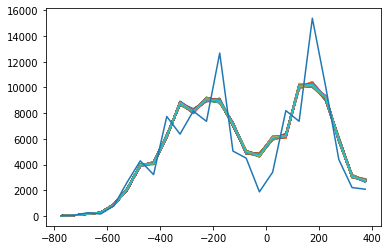

In [142]:
plot_timeblocks_data(PHI_complete_simulations)
x = [np.mean(tuptup[0]) for tuptup in PHI_avr_blocks]
y = [tuptup[1] for tuptup in PHI_avr_blocks]
plt.plot(x, y)

In [133]:
PHI_date_avr[:10]

0   -505.0
1   -500.0
2   -485.0
3   -484.5
4   -500.0
5      NaN
6   -455.0
7   -455.0
8   -458.0
9   -459.5
dtype: float64

In [107]:
#¬†creating a subdataframe
PHI_athens = PHI[PHI["tildeinfo"].str.contains("Athen", na=False)]
PHI_athens.head(5)

URL  ...                                       random_dates
79    https://epigraphy.packhum.org/text/80  ...                                               None
159  https://epigraphy.packhum.org/text/160  ...  [-420, -429, -420, -414, -433, -418, -431, -41...
416  https://epigraphy.packhum.org/text/417  ...  [-416, -416, -415, -416, -415, -415, -416, -41...
417  https://epigraphy.packhum.org/text/418  ...  [-415, -415, -415, -416, -415, -415, -415, -41...
516  https://epigraphy.packhum.org/text/517  ...  [-476, -477, -477, -477, -476, -477, -477, -47...

[5 rows x 26 columns]

In [108]:
athens_sim = timeblocks_from_randoms(PHI_athens, "random_dates", [-800, 400, 50])

In [109]:
athens_sim[0]

[((-800, -750), 1),
 ((-750, -700), 8),
 ((-700, -650), 10),
 ((-650, -600), 10),
 ((-600, -550), 102),
 ((-550, -500), 381),
 ((-500, -450), 1049),
 ((-450, -400), 629),
 ((-400, -350), 822),
 ((-350, -300), 1485),
 ((-300, -250), 958),
 ((-250, -200), 940),
 ((-200, -150), 613),
 ((-150, -100), 345),
 ((-100, -50), 226),
 ((-50, 0), 281),
 ((0, 50), 219),
 ((50, 100), 230),
 ((100, 150), 300),
 ((150, 200), 351),
 ((200, 250), 211),
 ((250, 300), 135),
 ((300, 350), 109),
 ((350, 400), 70)]

11224


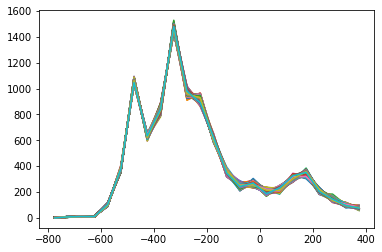

In [110]:
print(len(PHI_athens))
plot_timeblocks_data(athens_sim)

In [112]:
desc_stat_from_simulations(athens_sim)

temp_block   min   max      mean  median    variance
0   (-800, -750)     0     3     1.228     1.0    0.702016
1   (-750, -700)     4    12     7.751     8.0    1.636999
2   (-700, -650)     5    15     9.705    10.0    2.533975
3   (-650, -600)     6    17    10.997    11.0    2.998991
4   (-600, -550)    86   118   102.925   103.0   23.853375
5   (-550, -500)   349   408   374.583   375.0   75.037111
6   (-500, -450)  1028  1094  1061.648  1061.0  135.646096
7   (-450, -400)   594   660   628.545   628.0  105.127975
8   (-400, -350)   781   889   835.509   835.0  262.669919
9   (-350, -300)  1419  1528  1471.713  1471.0  266.880631
10  (-300, -250)   910  1020   964.064   963.5  317.577904
11  (-250, -200)   861   967   918.937   919.0  306.627031
12  (-200, -150)   580   656   617.201   617.0  132.012599
13  (-150, -100)   316   394   351.008   351.0  138.267936
14   (-100, -50)   209   287   247.548   247.0  144.065696
15      (-50, 0)   231   305   264.764   265.0  140.846304
16       (0, 50)   169   239   204.472   205.0  125.463216
17     (50, 100)   184   253   219.570   220.0  121.285100
18    (100, 150)   275   346   308.520   308.0  138.779600
19    (150, 200)   303   384   346.005   346.0  138.582975
20    (200, 250)   181   237   209.373   209.0   85.195871
21    (250, 300)   119   184   146.482   146.0   87.179676
22    (300, 350)    78   121    99.850    99.0   49.811500
23    (350, 400)    57    97    77.651    78.0   37.511199

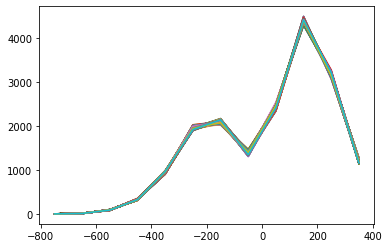

In [113]:
PHI_asia_minor = PHI[PHI["hdr1"].str.contains("Asia Minor")]
PHI_asia_minor_sim = timeblocks_from_randoms(PHI_asia_minor, "random_dates", [-800, 400, 100])
plot_timeblocks_data(PHI_asia_minor_sim)